In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()
data1 = data.drop(['area_type','availability','society','balcony'],axis='columns')
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [3]:
data1.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [4]:
data2 = data1.dropna() # This line of code deletes all the null values in the dataset which doesnot effect the score of the ML model.
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [5]:
data2["BHK"] = data2["size"].apply(lambda x: int(x.split(' ')[0])) # This line of code handles the unstructured data  like "2 BHK " etc..... and adds a new column .
data2.head()

C:\Users\Vulloju shabaresh\AppData\Local\Temp\ipykernel_27256\1548621379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["BHK"] = data2["size"].apply(lambda x: int(x.split(' ')[0])) # This line of code handles the unstructured data  like "2 BHK " etc..... and adds a new column .


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [6]:
# This function is used to handle the unstructured data in the column total_sft example 1056 - 1256 etc........
def intcon(x):
    tokens = x.split("-")
    if( len(tokens) == 2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
data2["total_sqft"].unique()
data2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [7]:
data2["total_sqft"] = data["total_sqft"].apply(intcon)
data2.head(30)

C:\Users\Vulloju shabaresh\AppData\Local\Temp\ipykernel_27256\411276211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["total_sqft"] = data["total_sqft"].apply(intcon)


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [8]:
# Adding a new column for calculating the price for the square feet.
data3 = data2.copy() # This creates a duplicate dataFrame.
data3["Price_per_sqft"] = data3["price"]*100000 / data3["total_sqft"]
data3.head(15)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [9]:
data3["location"] = data3.location.apply(lambda x : x .strip()) # This removes  any leading, and trailing whitespaces.Leading means at the beginning of the string, trailing means at the end.
locationinfo = data3.groupby("location")["location"].agg('count').sort_values()
locationinfo

location
1 Annasandrapalya      1
Kudlu Village,         1
Kumbhena Agrahara      1
Kuvempu Layout         1
LIC Colony             1
                    ... 
Thanisandra          236
Kanakpura Road       266
Electronic City      304
Sarjapur  Road       392
Whitefield           535
Name: location, Length: 1293, dtype: int64

In [10]:
locationinfoless =locationinfo[locationinfo <= 10] # This gives the location that have less than 10 houses
len(locationinfoless)# 1052
locationinfoless

location
1 Annasandrapalya       1
Kudlu Village,          1
Kumbhena Agrahara       1
Kuvempu Layout          1
LIC Colony              1
                       ..
Kalkere                10
Naganathapura          10
Sector 1 HSR Layout    10
Basapura               10
BTM 1st Stage          10
Name: location, Length: 1052, dtype: int64

In [11]:
# Replacing the locationinfoless values with other to avoid Dimentionality curse .....
data3["location"] = data3["location"].apply(lambda x : "others" if x in locationinfoless else x)
len(data3.location.unique()) 
data3.shape

(13246, 7)

In [12]:
# Removing  the outliers using domain knowledge in the real-estate field
data4 = data3[~(data3.total_sqft/data3.BHK<350)]
data4.shape

(12152, 7)

In [13]:
data4.Price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [14]:
# Removing the outliers using the 1 standard deviation 
def outliers(x):
    res = pd.DataFrame()
    for loc , subdf in x.groupby("location"):
        mean_price = np.mean(subdf.Price_per_sqft) # Calculating the mean 
        std_price = np.std(subdf.Price_per_sqft)  # Calculating the standard deviation
        reduced_df = subdf[(subdf.Price_per_sqft >(mean_price- std_price)) & (subdf.Price_per_sqft <= mean_price + std_price)] # Data within the one standard deviation 
        res = pd.concat([res,reduced_df],ignore_index=True) 
    return res
data5 = outliers(data4)
data5.shape

(9838, 7)

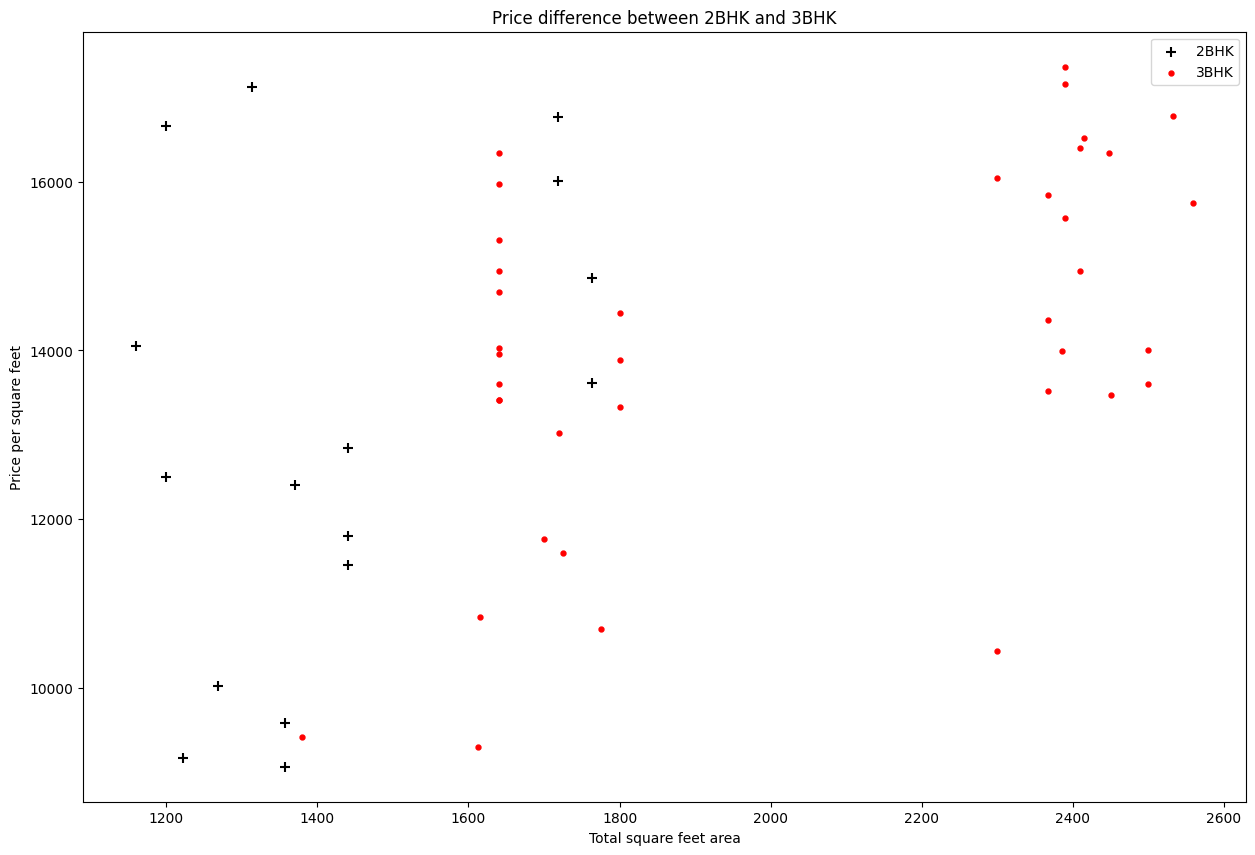

In [15]:
# This code is  used to generate a graph represents the price overlapping of 2BHK and 3BHK which have the same cost.
import matplotlib
def ploting(df , location):
    bh2 = df[(df.location == location) & (df["BHK"]== 2)]
    bh3 = df[(df.location == location) & (df["BHK"] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15 , 10)
    plt.scatter(bh2.total_sqft , bh2.Price_per_sqft , marker = "+",label = "2BHK",color='black',s = 50)
    plt.scatter(bh3.total_sqft , bh3.Price_per_sqft , marker = ".",label = "3BHK",color='red',s = 50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title("Price difference between 2BHK and 3BHK")
    plt.legend()
    
ploting(data5,"Rajaji Nagar")
    

In [16]:
# Removing outliers of the data having the same total_square feet area , location but differ in the BHK and price per square feet.
def  removing_BHK(df):
    index = np.array([])
    for loc , loc_df in df.groupby('location'):
        info = {}
        for bhk , bhk_df in loc_df.groupby('BHK'):
            info[bhk] = {
                'mean':np.mean(bhk_df.Price_per_sqft),
                'std':np.std(bhk_df.Price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk , bhk_df in loc_df.groupby('BHK'):
            stats = info.get(bhk - 1)
            if stats and stats['count'] > 5:
                index = np.append(index , bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(index,axis = 'index')
data6 = removing_BHK(data5)
data6.shape

(7035, 7)

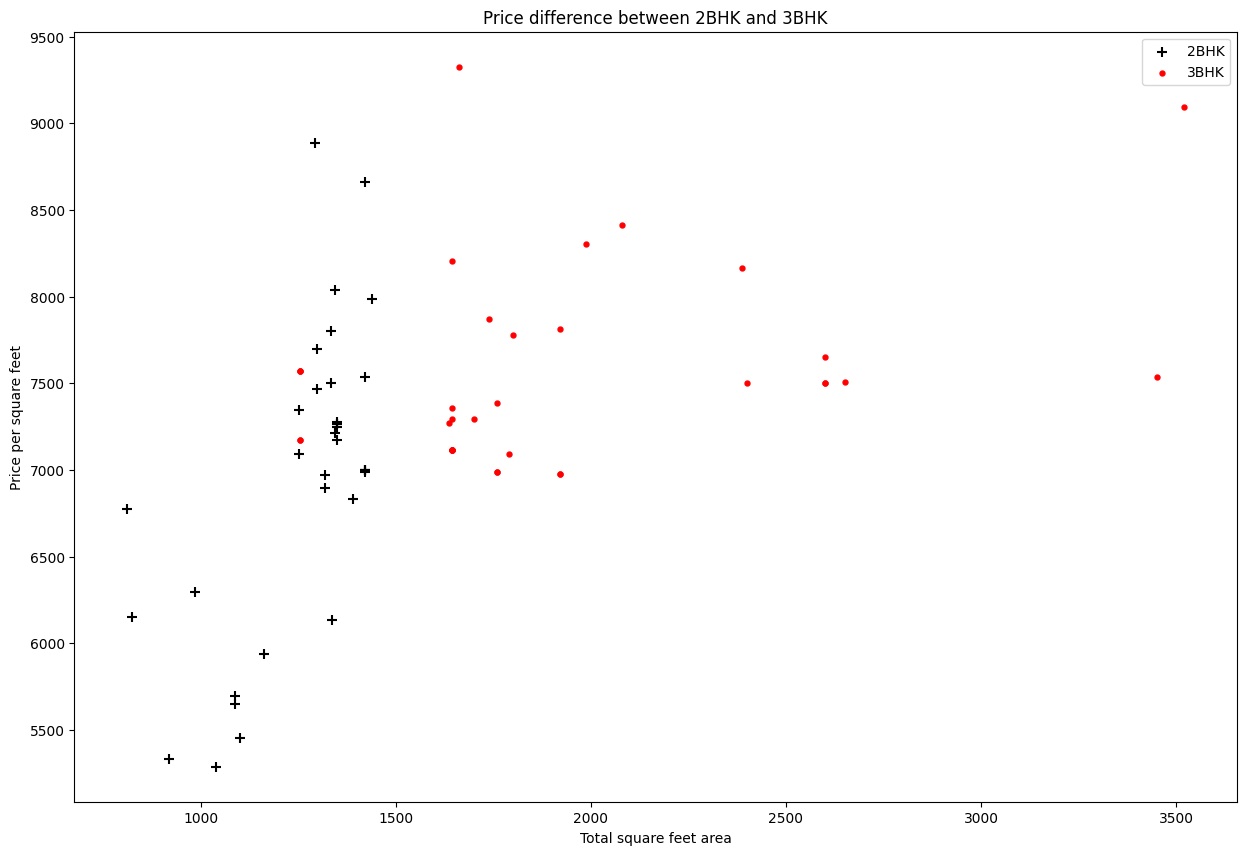

In [17]:
ploting(data6,"Hebbal")

Text(0, 0.5, 'count')

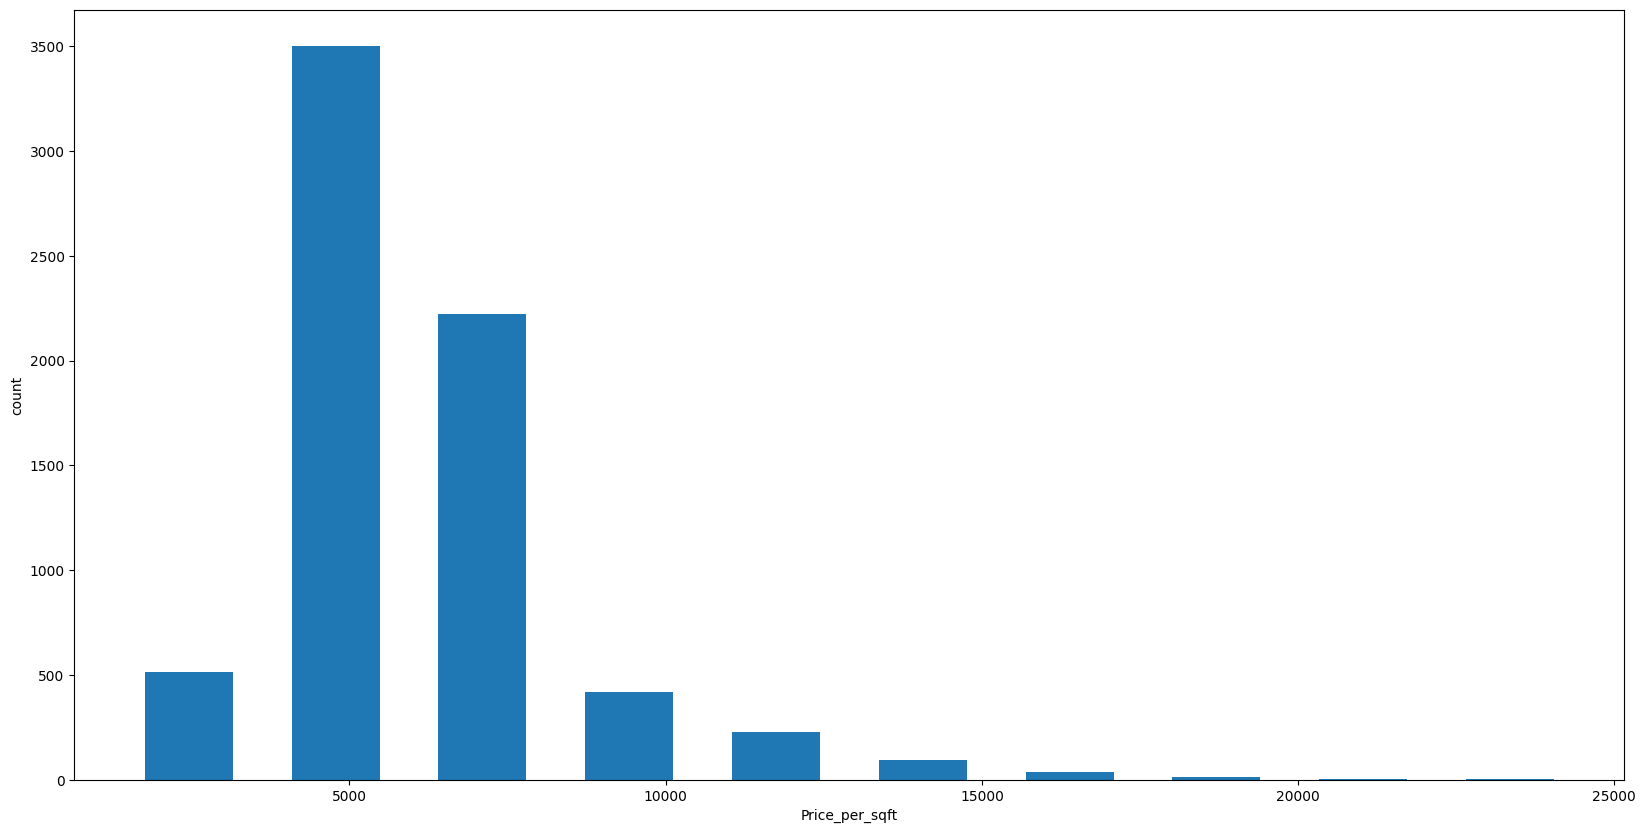

In [18]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data6.Price_per_sqft,rwidth=0.6)
plt.xlabel("Price_per_sqft")
plt.ylabel("count")

In [19]:
data7 = data6[~(data6.bath>data6.BHK+2)]
data7.head()
data7.shape

(7031, 7)

(array([4.604e+03, 1.710e+03, 6.130e+02, 6.900e+01, 2.400e+01, 6.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

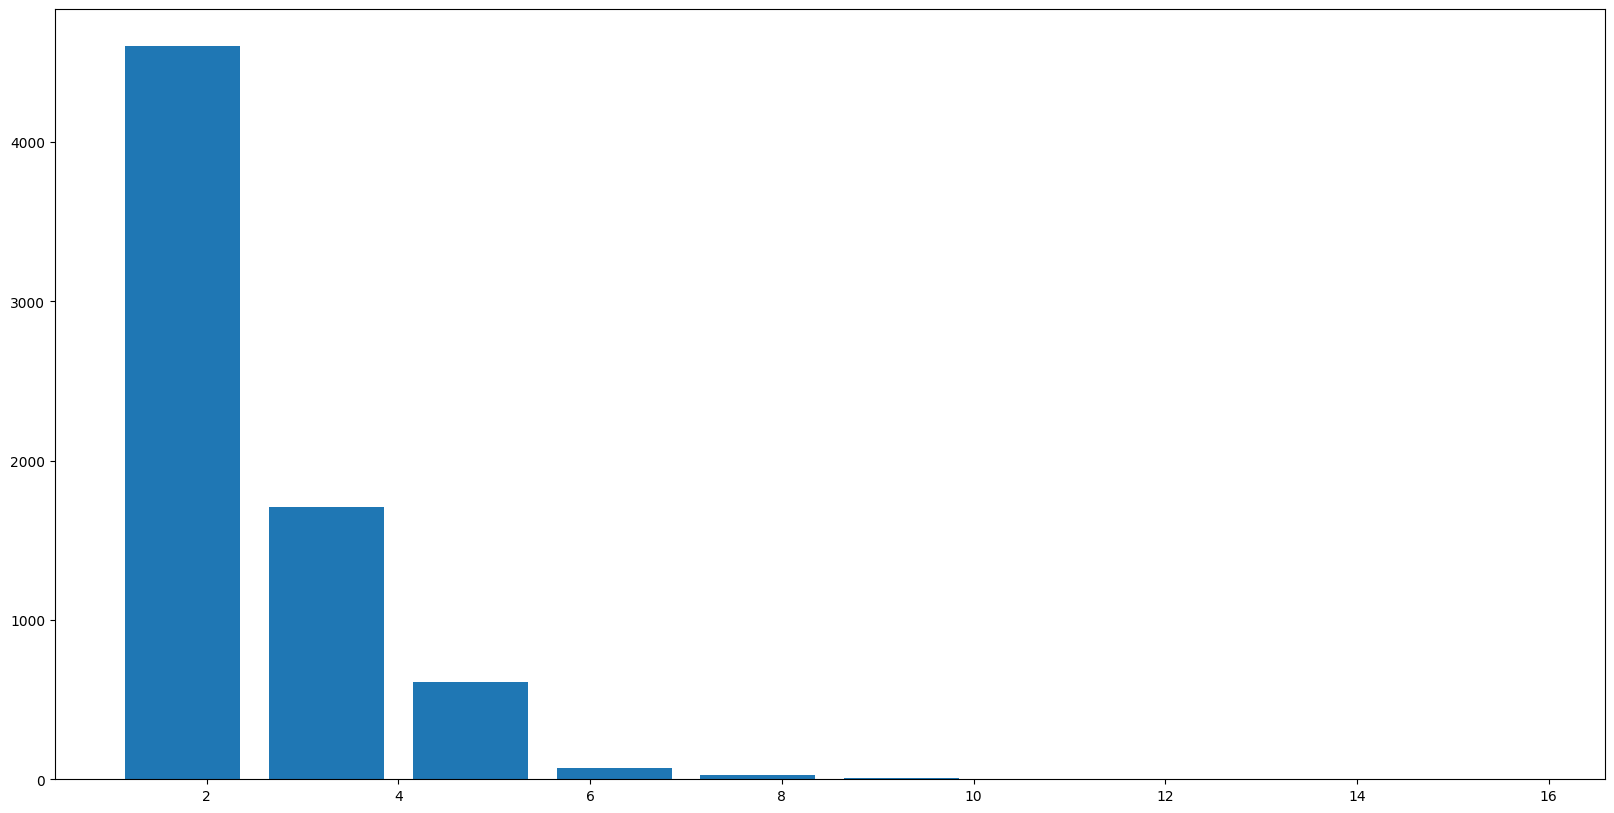

In [20]:
plt.hist(data7.bath,rwidth=0.8) # Data visualization of the number of baths in different BHK .

In [21]:
# Removing the unwanted columns or data.
data8 = data7.drop(["size","Price_per_sqft"],axis = 'columns')
data8.head(10)
data8.shape

(7031, 5)

In [22]:
data8.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [23]:
# Creating the dummies of the column location as the machine only understands 0 and 1.
dummies = pd.get_dummies(data8.location , dtype= int)
data9 = pd.concat([data8 , dummies.drop("others",axis = 'columns')], axis ='columns') # Removing the " others" column from the data.
data9
data10 = data9.drop("location", axis="columns") # Removing the location column from the data set .
data10



,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9830,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9834,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y= data10["price"] # Target values from the data.
x = data10.drop('price',axis='columns') # other features of the data 
x.head()
x
y

0       428.0
1       194.0
2       235.0
3       130.0
4       148.0
        ...  
9829     70.0
9830    200.0
9833    110.0
9834     26.0
9837    400.0
Name: price, Length: 7031, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split 
# Spliting the data into test data set and train data set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
#The random_state is a pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code.


In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)  
model.score(x_test,y_test)


0.8356576320374375

In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
# using kfold cross validation method to check the score of different random values
cv =ShuffleSplit(n_splits=5,test_size=0.3 , random_state=0)
cross_val_score(LinearRegression(),x,y,cv =cv)

array([0.82127734, 0.84532257, 0.83539825, 0.85321256, 0.8424384 ])

(array([154], dtype=int64),)

In [36]:
import numpy as np
def predictprice(location,sqft,bath,bhk):
    locindex=np.where(x.columns==location)
    locindex =locindex[0]
    l=np.zeros(len(x.columns))
    l[0] = sqft
    l[1] = bath
    l[1] = bhk 
    if(locindex>=0):
        l[locindex]=1
    return model.predict([l])[0]

In [47]:
predictprice("mysore road",1000,2,2)

C:\Users\Vulloju shabaresh\AppData\Local\Temp\ipykernel_27256\138013325.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if(locindex>=0):
e:\DataScience\ML\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.40406661859825

In [31]:
import pickle
with open('bangalore_house.pickle','wb') as f:
    pickle.dump(model,f)

In [32]:
import json 
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))